# Exploratory Data Science

This notebook is basically to explore the different frameworks and tools associated with data science work in Python. It's essentially a tutorial/introduction into using the tools, as well as the related data science techniques. It's performed based on the tutorials found here:

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

## Import Necessary Modules & Data

Before any data wrangling/munging is done, it's necessary to bring in any relevant modules for preprocessing. This includes Pandas, Numpy and Matplotlib. Then, pandas is used to read the sample loan data into a dataframe.

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("/Users/jeet/Dropbox/Jeet/Developer/ML:AI/DS - Loan Prediction/train_u6lujuX_CVtuZ9i.csv")

In [48]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Initial Data Exploration
Utilize pandas to perform some simple checks/numerical analysis on the data given. 

### Numerical Variables
Through the analysis below, we can spot various things such as missing values, data skew etc. All this is explained below.

In [49]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Inferences
There are many key inferences can be made from the numerical analysis above.

##### Missing Values
Notice that there are a total of 614 values in the dataframe. Thus there are 22 missing LoanAmounts, 14 missing Loan_Amount_Terms and 50 missing Credit_Histories.

##### Skew in the Data
Skew in the data can be assessed by comparing the mean of the data to the median/50% value, and seeing how similar they are. Thus, ApplicantIncome and CoapplicantIncome seem in line with the expected distribution.

##### Other Relevant Percentages
84% of candidates have a credit history that meet the guidelines! How? Credit history is either a 1 or a 0, and the net value is 0.842!

### Categorical Variables
Non-numerical variables can be initially analyzed by looking at their counts, and how often the different values occur.

In [50]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

## Distribution Analysis

For the numerical variables, we can look at their distributions to spot any extreme values / outliers / anomalies. Variables that have outliers will require a lot of data munging/wrangling, such that anomalies can be dealt with. The distrubtion analysis can be done using both histograms, and box plots.

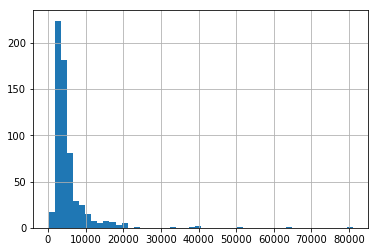

In [51]:
df["ApplicantIncome"].hist(bins=50)

Notice that there are a variety of anomalies/extreme values. To confirm the presence of outliers, a box plot can also be utilized.

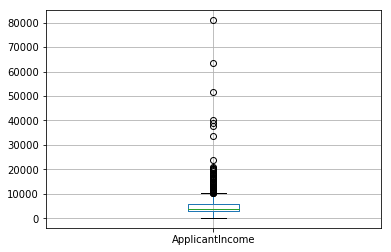

In [52]:
df.boxplot(column="ApplicantIncome")

Clearly, there are numerous outliers/edge values in the applicant income. Perhaps this is due to the income disparity / unequal distirbution of wealth in society. We can check the impact that gender and education have on these edge values by grouping the box plot with other columns.

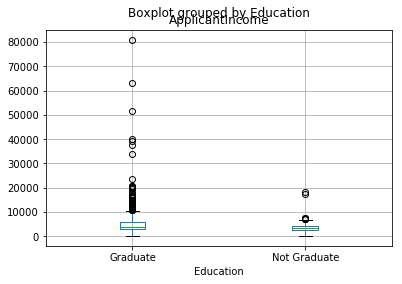

In [53]:
df.boxplot(column="ApplicantIncome", by="Education")

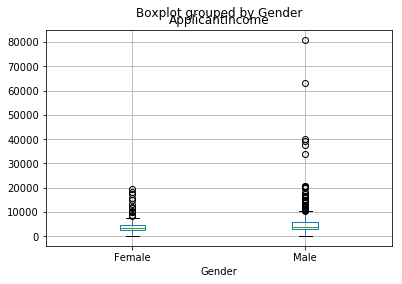

In [54]:
df.boxplot(column="ApplicantIncome", by="Gender")

In both cases, the mean/average applicant income is the same regardless of education or gender. However, the outlier/extreme values seem to occur for Male Graduates!

## Categorical Analysis

We can use pivot-tables and cross-tabulation to better understand how the categorical variables affect each other, as well as the final loan amount given.

In [55]:
temp1 = df["Credit_History"].value_counts(ascending=True)
temp2 = df.pivot_table(values="Loan_Status", index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print "Frequency Table for Credit History: "
print temp1

print "\n Probability of Getting a Loan for each Credit History Class: "
print temp2

Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of Getting a Loan for each Credit History Class: 
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


Pivot tables can be plotted as bar graphs, in order to get a better sense of what they represent!

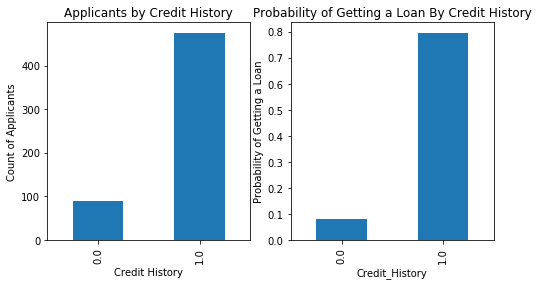

In [58]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Credit History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Credit History")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Credit History")
ax2.set_ylabel("Probability of Getting a Loan")
ax2.set_title("Probability of Getting a Loan By Credit History")
temp2.plot(kind="bar")

Thus, clearly there's a way greater chance (80% - almost 8x as much) of getting a loan if you're credit history is good.

Similarly, we can see similar plots for the effect of self-employment and marriage:

In [59]:
temp1 = df["Self_Employed"].value_counts(ascending=True)
temp2 = df.pivot_table(values="Loan_Status", index=['Self_Employed'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print "Frequency Table for Self Employment: "
print temp1

print "\n Probability of Getting a Loan for each Self Employment Class: "
print temp2

Frequency Table for Self Employment: 
Yes     82
No     500
Name: Self_Employed, dtype: int64

 Probability of Getting a Loan for each Self Employment Class: 
Self_Employed
No     0.686000
Yes    0.682927
Name: Loan_Status, dtype: float64


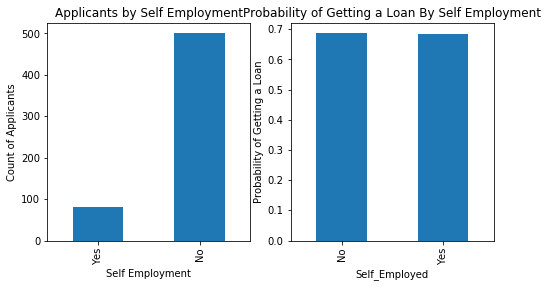

In [60]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Self Employment")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Self Employment")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Self Employment")
ax2.set_ylabel("Probability of Getting a Loan")
ax2.set_title("Probability of Getting a Loan By Self Employment")
temp2.plot(kind="bar")

Clearly, with employment, you're just as likely to get a loan if you're self employed, or work for someone else. Thus, this variable doesn't really affect your likelihood of getting a loan! Let's see the effect of marriage.

In [61]:
temp1 = df["Married"].value_counts(ascending=True)
temp2 = df.pivot_table(values="Loan_Status", index=['Married'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print "Frequency Table for Marriage: "
print temp1

print "\n Probability of Getting a Loan for each Marriage Class: "
print temp2

Frequency Table for Marriage: 
No     213
Yes    398
Name: Married, dtype: int64

 Probability of Getting a Loan for each Marriage Class: 
Married
No     0.629108
Yes    0.716080
Name: Loan_Status, dtype: float64


Just from the probabilities above, it's easy to say the same thing for marriage -> doesn't seem to affect how likely you are to get a loan!

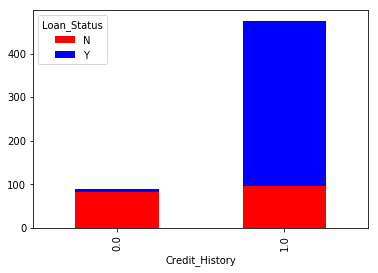

In [63]:
temp3 = pd.crosstab(df["Credit_History"], df["Loan_Status"])
temp3.plot(kind="bar", stacked=True, color=['red', 'blue'], grid=False)

## Data Munging

Having done some exploration, and noticed how various variables affect each other, we can now move to the actual data munging. As we noticed earlier, there are a lot of missing values for LoanAmount, Loan_Amount_Terms, and Credit_History. There were also many extreme/anomaly values for ApplicantIncome which need to be dealt with appropriately.

### Missing Values

We can see the missing values in each column by applying a lamda function to the entire dataframe, and summing the values that are null/NaNs.

In [66]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Since there are over 4x as many males, and we're only missing 13 values (13/614), it's a safe assumption that the remaining 13 values can be estimated as males as well. Thus, these can be replaced with the mode of the data (Male).

In [68]:
df["Gender"].fillna('Male', inplace=True)

In [69]:
df["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [70]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

Same thing here, since we're only missing 3 marriage values, we can replace it with the mode (in this case, it's Yes)

In [72]:
df["Married"].fillna('Yes', inplace=True)
df["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [74]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [84]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [86]:
df["Self_Employed"].fillna("Yes", inplace=True)
df["Self_Employed"].value_counts()

No     500
Yes    114
Name: Self_Employed, dtype: int64

In [87]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [92]:
df["Credit_History"].fillna(1.0, inplace=True)
df["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [95]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [101]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [114]:
df["Loan_Amount_Term"].fillna(360.0, inplace=True)

In [115]:
df["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [117]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
df["Dependents"].fillna(0, inplace=True)
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

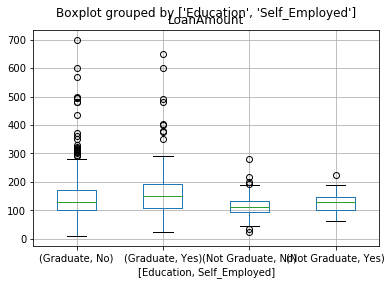

In [126]:
df.boxplot(column="LoanAmount", by=["Education", "Self_Employed"])

In [128]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [129]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outliers / Extreme Values

Outliers which are possible practically (ie. high loan amounts) can have their effect nullified by applying the log function to them.

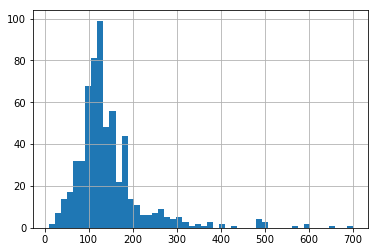

In [130]:
df["LoanAmount"].hist(bins=50)

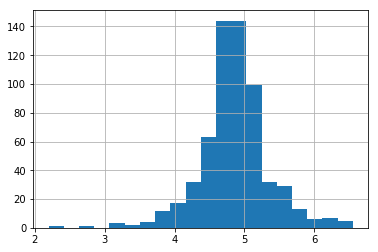

In [133]:
df["LoanAmountLog"] = np.log(df["LoanAmount"])
df["LoanAmountLog"].hist(bins=20)

Thus, these are better distributions than before (less skewed / moved by the outliers). 

To remove the outliers in ApplicantIncome, notice that outliers for low applicant income can exist if candidates have a strong coapplicant. Thus, we can add the two fields, and then apply a log!

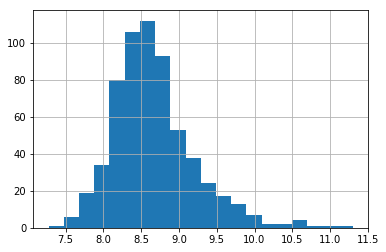

In [135]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncomeLog"] = np.log(df["TotalIncome"])
df["TotalIncomeLog"].hist(bins=20)

## Building Predictive Models

Having cleaned up the data, we can now build different predictive models and train them on this dataset. Scikit-learn is the perfect library to do this!

Note: Scikit-learn requries all it's variables to be numeric, thus the categorical variables need to be encoded and turned into numerical variables. Luckiy, scikit-learn provides a function to do just that!

In [136]:
from sklearn.preprocessing import LabelEncoder

var_mod = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmountLog        float64
TotalIncome          float64
TotalIncomeLog       float64
dtype: object

Having converted the entire data set to be numeric, we can now declare and run our machine learning model. Before chosing the specific mdoel type, we can abstract all the related details for training and cross-validation to a seperate function, since it's going to be the same for any model.

In [143]:
# Import necessary ML models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# Generic function for creating a classification model, and testing it's performance
def classification_model(model, data, predictors, outcome):
    
    # Fit the model
    model.fit(data[predictors], data[outcome])
    
    # Make predictions on training set
    predictions = model.predict(data[predictors])
    
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)
    
    # Perform K-Fold cross validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])
        
        # Get training targets
        train_target = data[outcome].iloc[train]
        
        # Train the algorithm using the data and the targets
        model.fit(train_predictors, train_target)
        
        # Record error from each cross validation run
        error.append(model.score(train_predictors, train_target))
        
    print "Cross Validation Score: %s" % "{0: .3%}".format(np.mean(error))
    
    # Fit the model again so it can be referred to outside the function
    model.fit(data[predictors], data[outcome])

## Model 1: Logistic Regression

We need to select a subset of the input variables in order to avoid overfitting. Let's start with Credit History (seemed to be a big predictor of loan success)

In [144]:
outcome_var = "Loan_Status"
model = LogisticRegression()
predictor_var = ["Credit_History"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross Validation Score:  80.945%


## Model 2: Decision Trees

In order to increase the accuracy, we can either devise smarter features (ie. applicantIncome/loanAmount -> tells you how likely they will pay back the loan), or get more accurate models. Decison Trees are a better/more accurate model than Logistic Regression.

In [145]:
model = DecisionTreeClassifier()
predictor_var = ["Credit_History", "Gender", "Married", "Education"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 80.945%
Cross Validation Score:  80.945%


Numerical variable of Credit History is dominating over the other categorical variables. We can try and replace them with other numerical variables.

In [147]:
predictor_var = ["Credit_History", "Loan_Amount_Term", "LoanAmountLog"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 88.925%
Cross Validation Score:  89.739%


## Model 3: Random Trees
An ensemble version of DTs, it's an even more sophisticated learning method. An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features. Let's see how this goes:

In [148]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ["Gender", "Married", "Self_Employed", "Dependents", "Education", "Loan_Amount_Term", "Credit_History",
                 "Property_Area", "LoanAmountLog", "TotalIncomeLog"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 100.000%
Cross Validation Score:  100.000%


Clearly, this model is overfitting! This can be avoided by 2 ways:
1. Reducing the number of predictors/input feature variables
2. Tuning the model parameters

Let's try both. First we look at the feature importance matrix that Random Trees provides to take the most important features.

In [149]:
# Create a series with the most important features
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print featimp

Credit_History      0.269251
TotalIncomeLog      0.263973
LoanAmountLog       0.220961
Dependents          0.057669
Property_Area       0.049244
Loan_Amount_Term    0.042794
Married             0.027709
Self_Employed       0.023350
Gender              0.022596
Education           0.022453
dtype: float64


Using the top 5 variables of importance: Credit_History, TotalIncomeLog, LoanAmountLog, Dependents and Property_Area, we can retrain the model. We also modify the parameters a bit.

In [150]:
model = RandomForestClassifier(n_estimators=25, max_depth=7, max_features=1)
predictor_var = ["Credit_History", "TotalIncomeLog", "Dependents", "LoanAmountLog", "Property_Area"]
classification_model(model, df, predictor_var, outcome_var)

Accuracy : 85.342%
Cross Validation Score:  86.075%


This exercise gives us some very interesting and unique learning:

1. Using a more sophisticated model does not guarantee better results.
2. Avoid using complex modeling techniques as a black box without understanding the underlying concepts. Doing so would increase the tendency of overfitting thus making your models less interpretable
3. Feature Engineering is the key to success. Everyone can use an Xgboost models but the real art and creativity lies in enhancing your features to better suit the model.